


Reproducing plots of paper: 
## Multiparticle Quantum Walks and Fisher Information in One-Dimensional Lattices
https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.127.100406

In [18]:




#import sys
#import numpy as np        # this is just to print the maximum size of the matrix without truncation
#np.set_printoptions(threshold=sys.maxsize)


import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
import math
from scipy.linalg import expm, sinm, cosm
%matplotlib inline
import time
from IPython.display import Image

import copy # I will use this to use Deepcopy
import itertools as it









import numpy as np
#%run sigma_matrix.ipynb
from itertools import combinations 
#from tenpy.algorithms
from tenpy.algorithms import tebd
from tenpy.networks.mps import MPS
from tenpy.models.fermions_hubbard import FermionicHubbardModel, FermionicHubbardChain
from tenpy import *
from tenpy.models.xxz_chain import XXZChain
from tenpy.models.lattice import Site, Chain
from tenpy.models.model import CouplingModel, NearestNeighborModel, MPOModel, CouplingMPOModel
#from tenpy.linalg import np_conserved as npc
from tenpy.tools.params import asConfig
from tenpy.networks.site import SpinHalfSite  # if you want to use the predefined site

from tenpy.networks.site import BosonSite,SpinHalfFermionSite,FermionSite
__all__ = ['BoseHubbardModel', 'BoseHubbardChain', 'FermiHubbardModel', 'FermiHubbardChain',
           'FermiHubbardModel2']
from tenpy.algorithms.algorithm import TimeEvolutionAlgorithm
from tenpy.linalg import np_conserved as npc
from tenpy.algorithms.truncation import svd_theta, TruncationError
from tenpy.linalg import random_matrix

In [30]:
def combine(arr, s):    # this is a function from itertools which 
    return list(combinations(arr, s)) 
L =40         # number of lattice sites
J =1 # coupling strength 
particle_numbers =3 # number of particles
lattice = np.arange(0,L,1) # lattice sites
# K/2pi goes from 0 to 1
K = 2*np.pi*lattice/(float(L))  #np.arange(0,1,0.1)
n_Set = combine(lattice,particle_numbers)

final_set = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for j in range(len(lattice)):
    for i in range(len(n_Set)):
        n1 = n_Set[i][0]
        n2 = n_Set[i][1]
        n3 = n_Set[i][2]
        if (lattice[j] == (n1+n2+n3)%L):
            final_set[j].append(n_Set[i])
  
    

In [31]:

Eigenvalues =  [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]#[[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for j in range(len(lattice)):
    for i in range(len(final_set[j])):
        sums =0
        n1 =final_set[j][i][0]  # k1
        n2 =final_set[j][i][1] 
        n3 = final_set[j][i][2]
        k1_a = n1*2*np.pi/(L)
        k2_a = n2*2*np.pi/(L)
        k3_a = n3*2*np.pi/(L)
        #r = (e1 + e2 +e3)*np.cos(e1 + e2 +e3)
        E_n = -2*J*(np.cos(k1_a) + np.cos(k2_a) +np.cos(k3_a))
        Eigenvalues[j].append(E_n)
          
#Eigenvalues

Text(0.5, 1.0, 'Energy Spectra of fermions for V = -1')

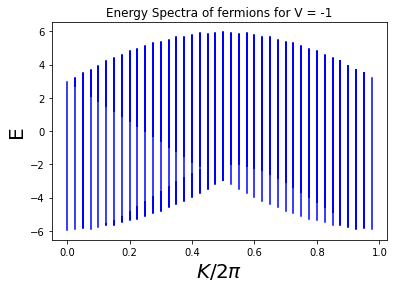

In [32]:
    
for i in range(int(len(lattice))):
    plt.plot([K[i]/(2*np.pi)]*len(Eigenvalues[i]),Eigenvalues[i],'-',color ='blue')    
plt.xlabel('$K/2\pi$',fontsize=20)
plt.ylabel('E',fontsize=20)
plt.title("Energy Spectra of fermions for V = -1")

## Plots 1(c)

Text(0.5, 1.0, 'Energy Spectra of fermions for various v values')

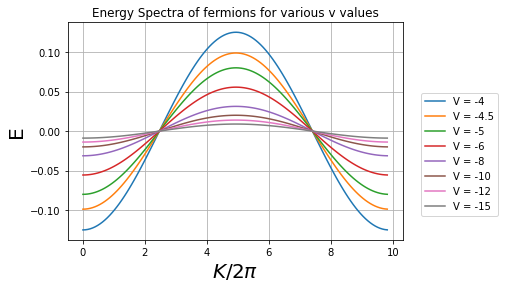

In [5]:
def spectr2(J,V,K):  
    return -2*np.cos(K)*((J**3)/V**2)
V = [-4,-4.5,-5,-6,-8,-10,-12,-15]
k = np.arange(0,2*np.pi,0.05)
spectro= []
J=1
for j in range(len(V)):
    for i in range(len(k)):
        spectro.append(spectr2(J,V[j],k[i]))
plt.plot(k/2*np.pi,spectro[0:len(k)], label = 'V = -4')
plt.plot(k/2*np.pi,spectro[len(k):2*len(k)],label = 'V = -4.5')
plt.plot(k/2*np.pi,spectro[2*len(k):3*len(k)],label = 'V = -5')
plt.plot(k/2*np.pi,spectro[3*len(k):4*len(k)],label = 'V = -6')
plt.plot(k/2*np.pi,spectro[4*len(k):5*len(k)],label = 'V = -8')


plt.plot(k/2*np.pi,spectro[5*len(k):6*len(k)],label = 'V = -10')
plt.plot(k/2*np.pi,spectro[6*len(k):7*len(k)],label = 'V = -12')
plt.plot(k/2*np.pi,spectro[7*len(k):8*len(k)],label = 'V = -15')
plt.legend(bbox_to_anchor=(1.3,0.7))
plt.xlabel('$K/2\pi$',fontsize=20)
plt.ylabel('E',fontsize=20)
plt.grid()
plt.title("Energy Spectra of fermions for various v values")

## TEBD

In [ ]:
ket_0 =  np.array([[1],[0]],dtype = 'complex')
ket_1 =  np.array([[0],[1]],dtype = 'complex')
C_dagger = np.array([[0,0],[1,0]],dtype = 'complex')
C = np.array([[0,1],[0,0]],dtype = 'complex')

In [33]:
import numpy as np
#%run sigma_matrix.ipynb
#from tenpy.algorithms
from scipy.linalg import expm
from tenpy.algorithms import tebd
from tenpy.networks.mps import MPS
from tenpy.models.fermions_hubbard import FermionicHubbardModel, FermionicHubbardChain
from tenpy import *
from tenpy.models.lattice import Site, Chain
from tenpy.models.model import CouplingModel, NearestNeighborModel, MPOModel, CouplingMPOModel
#from tenpy.linalg import np_conserved as npc
from tenpy.tools.params import asConfig
from tenpy.networks.site import SpinHalfSite  # if you want to use the predefined site

from tenpy.networks.site import BosonSite#SpinHalfFermionSite,FermionSite
__all__ = ['BoseHubbardModel', 'BoseHubbardChain', 'FermiHubbardModel', 'FermiHubbardChain',
           'FermiHubbardModel2']
from tenpy.algorithms.algorithm import TimeEvolutionAlgorithm
from tenpy.linalg import np_conserved as npc
from tenpy.algorithms.truncation import svd_theta, TruncationError
from tenpy.linalg import random_matrix

In [40]:
class SpinHalfSite(Site): # copied from tenpy github
    def __init__(self, conserve='Sz'):
        if not conserve:
            conserve = 'None'
        if conserve not in ['Sz', 'parity', 'None']:
            raise ValueError("invalid `conserve`: " + repr(conserve))
        Sx = [[0., 0.5], [0.5, 0.]]
        Sy = [[0., -0.5j], [+0.5j, 0.]]
        Sz = [[0.5, 0.], [0., -0.5]]
        Sp = [[0., 1.], [0., 0.]]  # == Sx + i Sy
        Sm = [[0., 0.], [1., 0.]]  # == Sx - i Sy
        first = [[1,0],[0,0]]
        second =[[0,0],[0,1]]
        C_dagger = np.array([[0,0],[1,0]],dtype = 'complex')
        C = np.array([[0,1],[0,0]],dtype = 'complex')
        Y_mat = np.array([[0,-1],[1,0]],dtype = 'complex')
        ops = dict(Sp=Sp, Sm=Sm, Sz=Sz,Y_mat = Y_mat,first=first, second =second,C=C ,C_dagger=C_dagger)
        if conserve == 'Sz':
            chinfo = npc.ChargeInfo([1], ['2*Sz'])
            leg = npc.LegCharge.from_qflat(chinfo, [1, -1])
        else:
            ops.update(Sx=Sx, Sy=Sy)
            if conserve == 'parity':
                chinfo = npc.ChargeInfo([2], ['parity_Sz'])
                leg = npc.LegCharge.from_qflat(chinfo, [1, 0])  # ([1, -1] would need ``qmod=[4]``)
            else:
                leg = npc.LegCharge.from_trivial(2)
        self.conserve = conserve
        # Specify Hermitian conjugates
        Site.__init__(self, leg, ['up', 'down'], **ops)
        # further alias for state labels
        self.state_labels['-0.5'] = self.state_labels['down']
        self.state_labels['0.5'] = self.state_labels['up']
        # Add Pauli matrices
        if conserve != 'Sz':
            self.add_op('Sigmax', 2. * self.Sx)
            self.add_op('Sigmay', 2. * self.Sy)
        self.add_op('Sigmaz', 2. * self.Sz)

    def __repr__(self):
        """Debug representation of self."""
        return "SpinHalfSite({c!r})".format(c=self.conserve)
    
    
    
    
    
    
    
class My_model1(CouplingMPOModel, NearestNeighborModel):
    """Another implementation of the Spin-1/2 XXZ chain with Sz conservation.
    This implementation takes the same parameters as the :class:`XXZChain`, but is implemented
    based on the :class:`~tenpy.models.model.CouplingMPOModel`.
    Parameters
    ----------
    model_params : dict | :class:`~tenpy.tools.params.Config`
        See :cfg:config:`XXZChain`
    """
    default_lattice = "Chain"
    force_default_lattice = True

    def init_sites(self, model_params):
        #return SpinHalfSite(conserve='Sz')  # use predefined Site
        return SpinHalfSite(conserve= None)

    def init_terms(self, model_params):
        # read out parameters
        J = model_params.get('J', 1)
    
        for u1, u2, dx in self.lat.pairs['nearest_neighbors']:
            self.add_coupling(J, u1, 'Sx', u2, 'Sx', dx) # add terms
            self.add_coupling(J, u1, 'Sy', u2, 'Sy', dx) # add terms
        
        
        for u in range(len(self.lat.unit_cell)):
            self.add_onsite(J, u, 'Y_mat')
           


In [45]:
state = np.array([[0,1]]*10,dtype = 'complex')
state   

array([[0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j]])

In [88]:
# TENPY
def Test_model(L,times,J,i):   
    idd1 = np.identity(2) 
    idd2 = np.identity(4) 
    matrix = []
      
    model_params = {'J' : J,
        'L': L, 'cons_N':None,'cons_Sz':None,
        'bc_MPS': 'finite'
    }
    
    
    
    M = My_model1(model_params)
    state = np.array([[1,0]]*L,dtype = 'complex')
    state[3] = [0,1]
    state[2] = [0,1]
   # state = np.array([[0,1],[0,1],[1,0],dtype = 'complex') 
    psi = MPS.from_product_state(M.lat.mps_sites(),state,dtype='complex')  
   
    
    
 

   
    tebd_params = {
        'N_steps': 1,       # Number of time steps dt to evolve. (The Trotter decompositions of order > 
                              # 1 are slightly more efficient if more than one step is performed at once.)
        'dt': 0.05,        
        'order': 4,                                          # Order of the algorithm.
                                                                #The total error scales as O(t, dt^order).
        'trunc_params': {'chi_max': 400, 'svd_min': 1.e-12}         #  chi_min- Keep at least chi_min Schmidt values.
        # chi_max-  Keep at most chi_max Schmidt values.  , # svd_min - Discard all small Schmidt values S[i] < svd_min.

    }
   
    eng = tebd.Engine(psi, M, tebd_params)
    # considering the subsystem A atom at site 3 
    
    def measurement(eng, data):
        keys = ['t','expec' ,'a','b']
        if data is None:
            data = dict([(k, []) for k in keys])
            
        data['t'].append(eng.evolved_time)
        #data['a'].append(eng.psi.expectation_value('first',i))
        #data['b'].append(eng.psi.expectation_value('second',i))
        data['expec'].append(eng.psi.expectation_value_term([('C_dagger', i), ('C', i)]))
  

        return data


    data = measurement(eng, None)

    while eng.evolved_time < times:
        eng.run()                                 # (Real-)time evolution with TEBD (time evolving block decimation).
        measurement(eng, data)

 
    return data['t'],data['expec']

In [89]:
densi = Test_model(L=40,times=2,J=1,i=0)

C:\Users\Aditya Prakash\Python39\lib\site-packages\tenpy\tools\params.py:233: UserWarning: unused options for config My_model1:
['cons_N', 'cons_Sz']
  warnings.warn(msg.format(keys=sorted(unused), name=self.name))
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_17464/1881360796.py:37: FutureWarning: Renamed `Engine` class to `TEBDEngine`.
  eng = tebd.Engine(psi, M, tebd_params)


In [90]:
len(densi[1][0:40])

40

In [91]:
V =np.array(densi[1][0:40]).reshape(5,8)

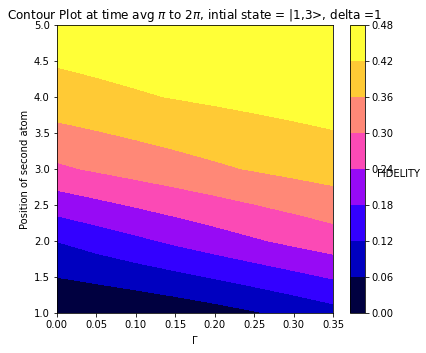

In [92]:
# DENSITY PLOT CODE
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
#p2 = np.arange(0,3 
X, Y = np.meshgrid(densi[0][0:8],[1,2,3,4,5])
cp = plt.contourf(X, Y, V,cmap=plt.get_cmap('gnuplot2'))
cs =plt.colorbar(cp)

ax.set_title('Contour Plot at time avg $\pi$ to $2\pi$, intial state = |1,3>, delta =1')
ax.set_xlabel('$\Gamma$')
ax.set_ylabel('Position of second atom')
cs.set_label('FIDELITY',rotation = 360)
plt.savefig('plots1.pdf', bbox_inches='tight')
plt.show()

In [53]:
p2 = np.arange(0,30,1) 

In [ ]:
test = []
for i in range()

In [299]:
def Model(J_z,J_xx,times,L,j):   
    # i is the postiion
   
    
   
    model_params = {
        'Jxx': J_xx    ,'Jz' : J_z , 'L' : L, 'hz' : 0,
        'bc_MPS': 'finite'
    }
    
    
    
    M = XXZChain(model_params)
   
    state = np.array([[1,0]]*int(L) ,dtype = 'complex')
    state[int(L/2)-1] = [0,1]
    state[int(L/2)] = [0,1]
    state[int(L/2)+1] = [0,1]
    psi = MPS.from_product_state(M.lat.mps_sites(),state,dtype='complex')##   
   
    
    
 

   
    tebd_params = {
        'N_steps': 1,       # Number of time steps dt to evolve. (The Trotter decompositions of order > 
                              # 1 are slightly more efficient if more than one step is performed at once.)
        'dt': 0.01,        
        'order': 4,                                          # Order of the algorithm.
                                                                #The total error scales as O(t, dt^order).
        'trunc_params': {'chi_max': 400, 'svd_min': 1.e-12}         #  chi_min- Keep at least chi_min Schmidt values.
        # chi_max-  Keep at most chi_max Schmidt values.  , # svd_min - Discard all small Schmidt values S[i] < svd_min.

    }
    #eng = TDVPEngine(psi, M, tebd_params)
   
    eng = tebd.Engine(psi, M, tebd_params)
    # considering the subsystem A atom at site 3 
    def measurement(eng, data):
        keys = ['t','dens_dist']
        if data is None:
            data = dict([(k, []) for k in keys])
        data['t'].append(eng.evolved_time)
        data['dens_dist'].append(eng.psi.expectation_value('JW',j))  # 'Sz',2 means its at site 3
        
        return data

   
    data = measurement(eng, None)

    while eng.evolved_time < times:
        #TDVPEngine.run()
        eng.run()                                 # (Real-)time evolution with TEBD (time evolving block decimation).
        measurement(eng, data)

   
    
    
    return   data['t'],data['dens_dist']

In [300]:
Model(J_z=1,J_xx=1,times=1,L=5,j=1)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_20272/2286623471.py:38: FutureWarning: Renamed `Engine` class to `TEBDEngine`.
  eng = tebd.Engine(psi, M, tebd_params)


([0.0,
  0.01,
  0.02,
  0.03,
  0.04,
  0.05,
  0.060000000000000005,
  0.07,
  0.08,
  0.09,
  0.09999999999999999,
  0.10999999999999999,
  0.11999999999999998,
  0.12999999999999998,
  0.13999999999999999,
  0.15,
  0.16,
  0.17,
  0.18000000000000002,
  0.19000000000000003,
  0.20000000000000004,
  0.21000000000000005,
  0.22000000000000006,
  0.23000000000000007,
  0.24000000000000007,
  0.25000000000000006,
  0.26000000000000006,
  0.2700000000000001,
  0.2800000000000001,
  0.2900000000000001,
  0.3000000000000001,
  0.3100000000000001,
  0.3200000000000001,
  0.3300000000000001,
  0.34000000000000014,
  0.35000000000000014,
  0.36000000000000015,
  0.37000000000000016,
  0.38000000000000017,
  0.3900000000000002,
  0.4000000000000002,
  0.4100000000000002,
  0.4200000000000002,
  0.4300000000000002,
  0.4400000000000002,
  0.45000000000000023,
  0.46000000000000024,
  0.47000000000000025,
  0.48000000000000026,
  0.49000000000000027,
  0.5000000000000002,
  0.5100000000000002,

In [298]:
ket_0 =  np.array([[1],[0]],dtype = 'complex')
ket_1 =  np.array([[0],[1]],dtype = 'complex')
C_dagger = np.array([[0,0],[1,0]],dtype = 'complex')
C = np.array([[0,1],[0,0]],dtype = 'complex')

## What basis to choose? How to calculate that expectation value

In [291]:
np.dot(C_dagger,C)

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])